In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import os

In [2]:
def histogram_equivalization(arr: np.ndarray):
    tot_pixels = arr.shape[0]*arr.shape[1]
    freq = Counter(np.ravel(arr).tolist()) # get freq of the items
    freq = sorted(freq.items(), key=lambda l: l[0]) # sort by intensity values
    mp = defaultdict(int)
    cumm_sum = 0
    for intensity, count in freq:
        cumm_sum += count
        prob = cumm_sum/tot_pixels
        mp[intensity] = int(255*prob)
    
    map_func = np.vectorize(lambda x: mp.get(x, x)) # func to map old intensities to new intensities
    new_arr = map_func(arr)
    return new_arr.astype(np.uint8) # 8 bit encoding for grayscale image

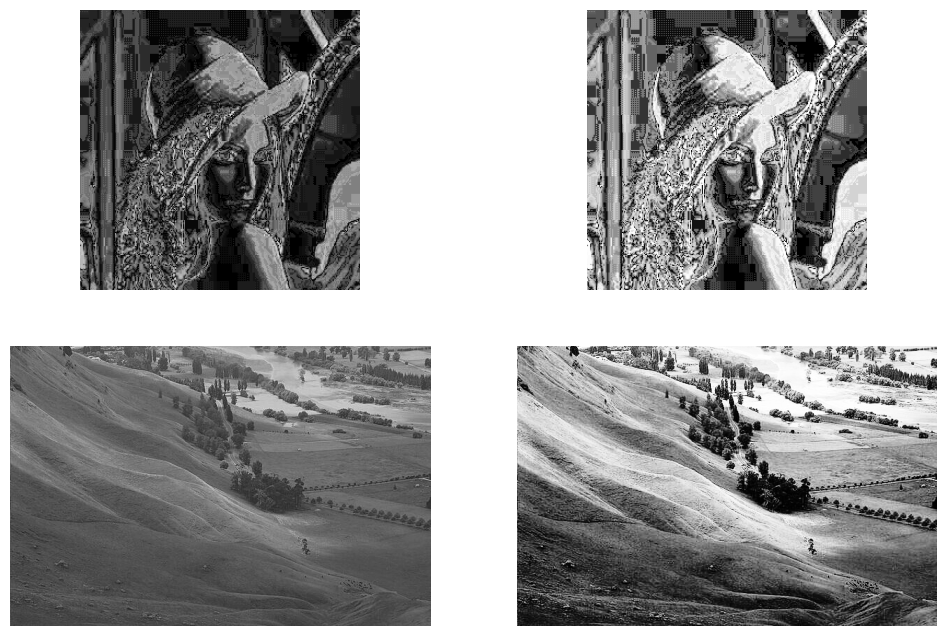

In [3]:
image_paths = [os.path.join('imgs', filename) for filename in os.listdir("imgs")]
num_images = len(image_paths)
_, axs = plt.subplots(num_images, 2, figsize=(12, 4*num_images))
for i in range(num_images):
    original_arr = np.array(Image.open(image_paths[i]))
    axs[i, 0].imshow(original_arr, cmap="gray")
    axs[i, 0].axis("off")
    axs[i, 1].imshow(histogram_equivalization(original_arr), cmap="gray")
    axs[i, 1].axis("off")